In [483]:
import numpy as np
import pandas as pd

Problem Statement
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the American market.

In [484]:
car=pd.read_csv("C:\\Users\\admin\\Downloads\\archive\\CarPrice_Assignment.csv")

In [485]:
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [486]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [487]:
car.shape

(205, 26)

In [488]:
car.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [489]:
car.isnull().sum() # no null values

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [490]:
car.symboling = car.symboling.map({-3: 'safe', -2: 'safe',-1: 'safe',0: 'moderate',1: 'moderate',2: 'risky',3:'risky'})

In [491]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

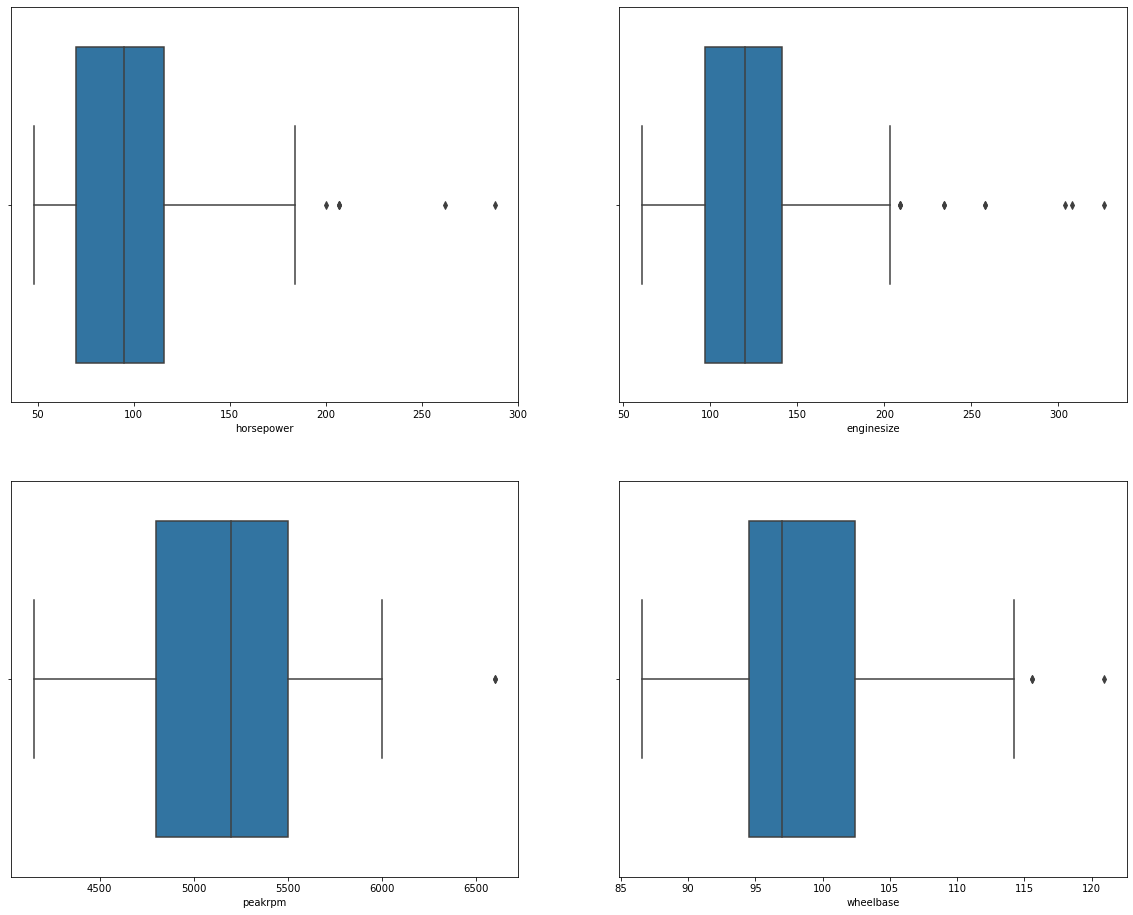

In [492]:
plt.figure(figsize=(20, 16))
plt.subplot(2,2,1)
sns.boxplot(x = 'horsepower', data = car)
plt.subplot(2,2,2)
sns.boxplot(x = 'enginesize',  data = car)
plt.subplot(2,2,3)
sns.boxplot(x = 'peakrpm',  data = car)
plt.subplot(2,2,4)
sns.boxplot(x = 'wheelbase', data = car)


plt.show()

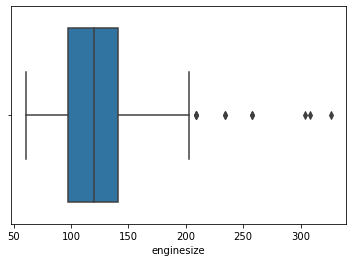

In [493]:
sns.boxplot(x = 'enginesize',  data = car)
Q1=car.enginesize.quantile(0.25)
Q2=car.enginesize.quantile(0.75)
IQR=Q2-Q1
car =car[(car.enginesize>=Q1-1.5*IQR)&(car.enginesize<=Q2+1.5*IQR)]

<AxesSubplot:xlabel='enginesize'>

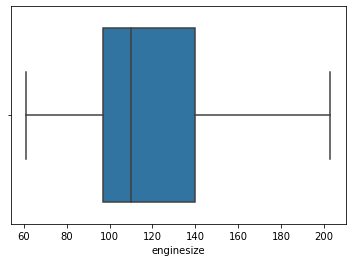

In [494]:
sns.boxplot(x = 'enginesize',  data = car)

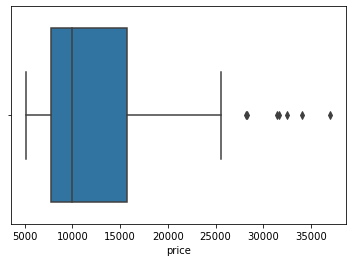

In [495]:
sns.boxplot(x = 'price',  data = car)
Q1=car.price.quantile(0.25)
Q2=car.price.quantile(0.75)
IQR=Q2-Q1
car =car[(car.price>=Q1-1.5*IQR)&(car.price<=Q2+1.5*IQR)]

<AxesSubplot:xlabel='price'>

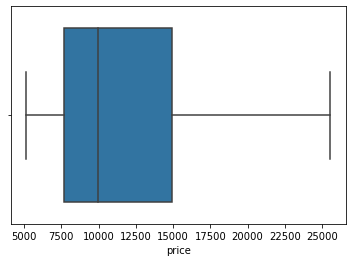

In [496]:
sns.boxplot(x = 'price',  data = car)

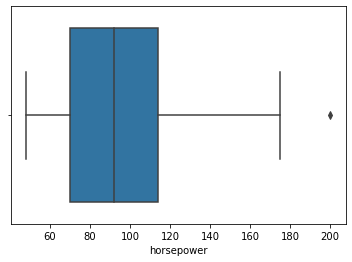

In [497]:
sns.boxplot(x = 'horsepower',  data = car)
Q1=car.horsepower.quantile(0.25)
Q2=car.horsepower.quantile(0.75)
IQR=Q2-Q1
car =car[(car.horsepower>=Q1-1.5*IQR)&(car.horsepower<=Q2+1.5*IQR)]

<AxesSubplot:xlabel='horsepower'>

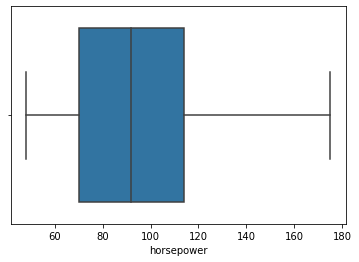

In [498]:
sns.boxplot(x = 'horsepower',  data = car)

In [499]:
car.loc[:,'carwidth/carlength'] = car.carwidth/car.carlength

In [500]:
car.loc[:,'highway/city'] = car.highwaympg/car.citympg

In [501]:
car.loc[:,'curbweight/enginesize'] = car.curbweight/car.enginesize

In [502]:
car.loc[:,'enginesize/horsepower'] = car.enginesize/car.horsepower

In [503]:
car.drop(columns = ['enginesize','carwidth', 'carlength', 'highwaympg', 'citympg','car_ID'], inplace = True)

In [504]:
car['fuelsystem'].replace('mfi','mpfi',inplace=True)
car['enginetype'].replace('dohcv','dohc',inplace = True)
car['enginetype'].replace('ohcv','ohc',inplace = True)
car['drivewheel'].replace('4wd', 'fwd', inplace = True)

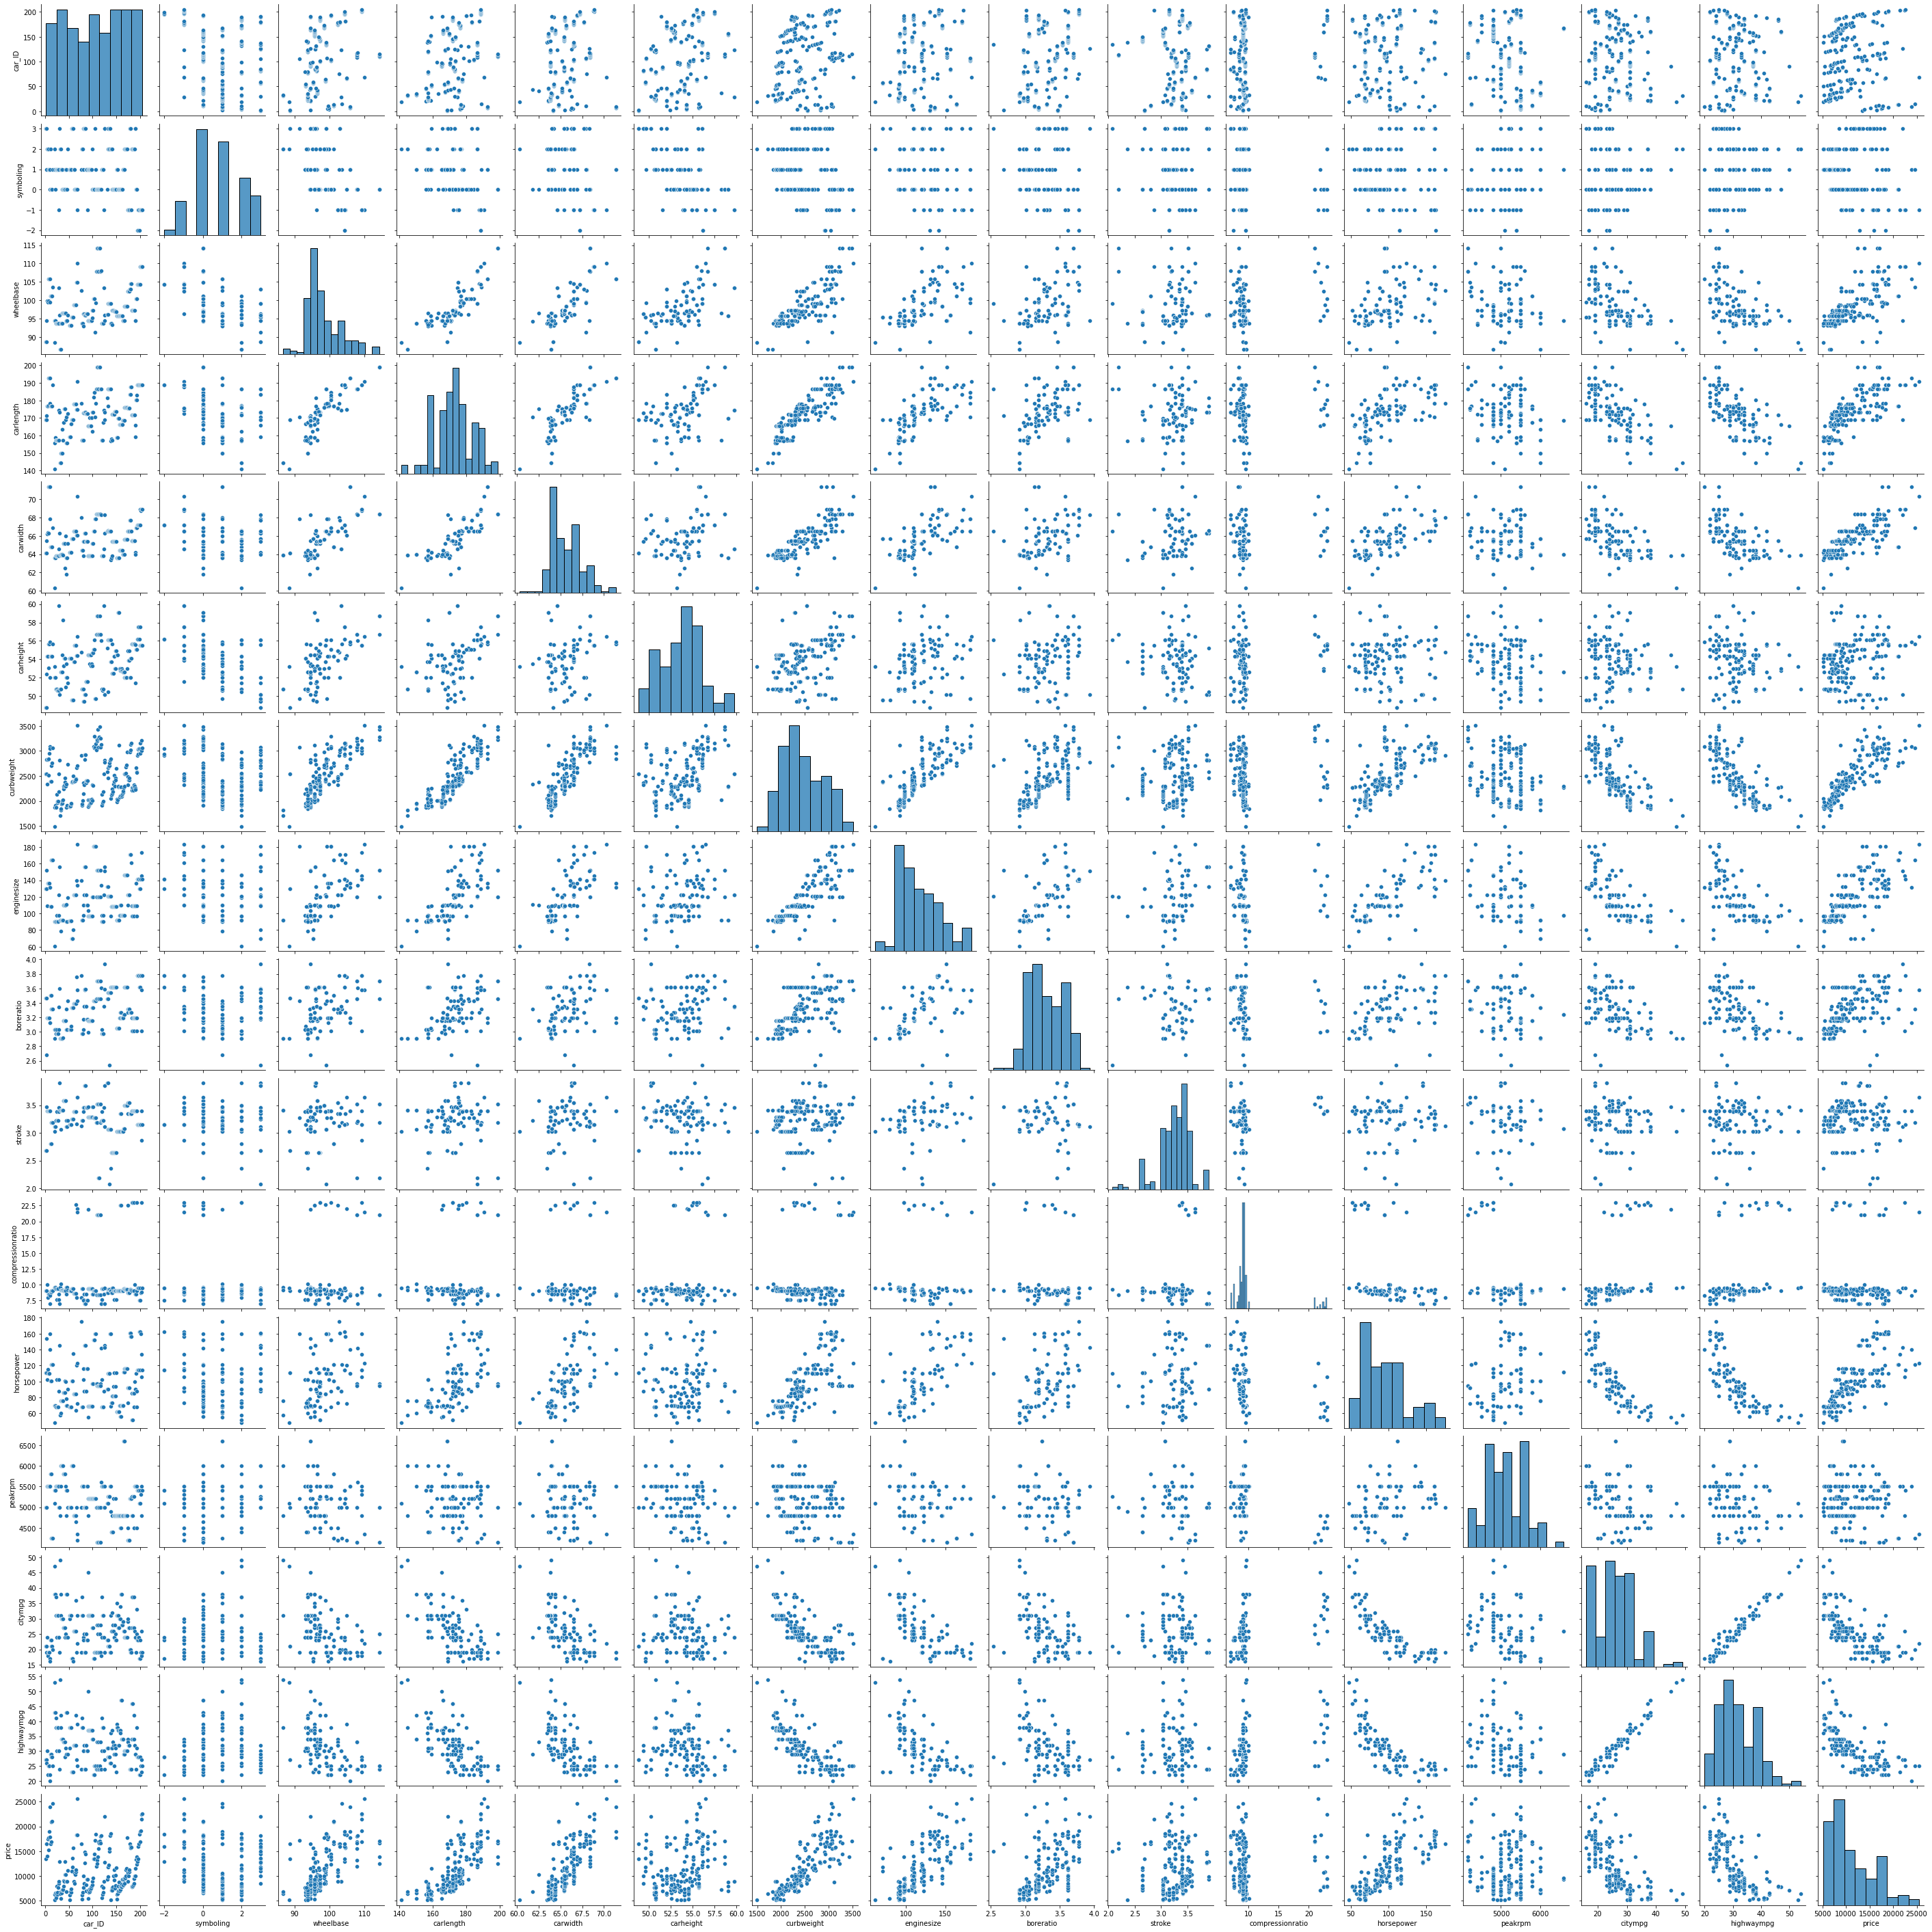

In [84]:
sns.pairplot(car)
plt.show()

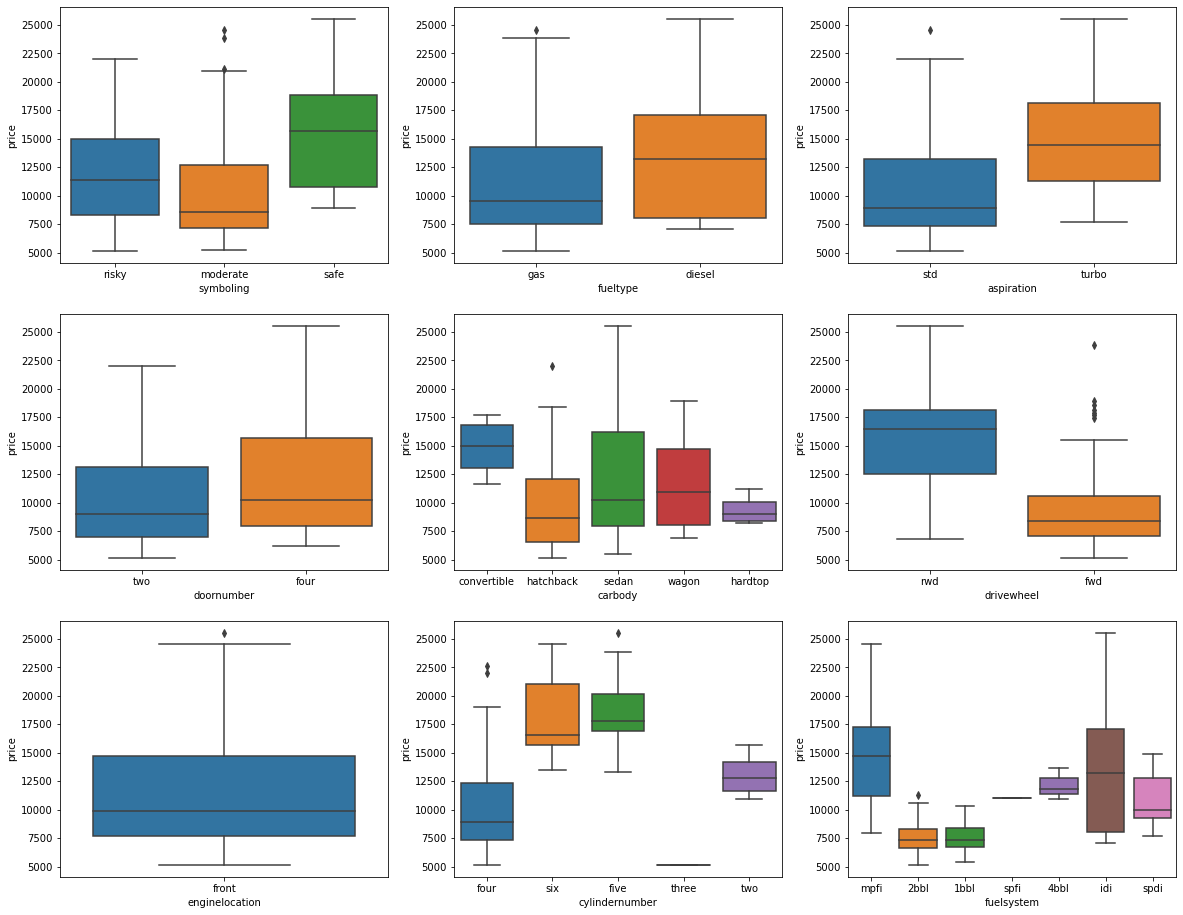

In [401]:
plt.figure(figsize=(20, 16))
plt.subplot(3,3,1)
sns.boxplot(x = 'symboling', y = 'price', data = car)
plt.subplot(3,3,2)
sns.boxplot(x = 'fueltype', y = 'price', data = car)
plt.subplot(3,3,3)
sns.boxplot(x = 'aspiration', y = 'price', data = car)
plt.subplot(3,3,4)
sns.boxplot(x = 'doornumber', y = 'price', data = car)
plt.subplot(3,3,5)
sns.boxplot(x = 'carbody', y = 'price', data = car)
plt.subplot(3,3,6)
sns.boxplot(x = 'drivewheel', y = 'price', data = car)
plt.subplot(3,3,7)
sns.boxplot(x = 'enginelocation', y = 'price', data = car)
plt.subplot(3,3,8)
sns.boxplot(x = 'cylindernumber', y = 'price', data = car)
plt.subplot(3,3,9)
sns.boxplot(x = 'fuelsystem', y = 'price', data = car)
plt.show()


In [505]:
varlist=['doornumber','cylindernumber']

In [506]:
def mapx(x):
    return x.map({'one':1,'two':2,'three':3,"four":4,"five":5,"six":6})

In [507]:
car[varlist]=car[varlist].apply(mapx)

In [508]:
car.loc[:,'CarName'] = car.CarName.str.split(' ').str[0]

In [509]:
car.CarName = car.CarName.apply(lambda x: str(x).lower())

In [510]:
car['CarName'].replace('maxda','mazda',inplace=True)
car['CarName'].replace('porcshce','porsche',inplace=True)
car['CarName'].replace('toyouta','toyota',inplace=True)
car['CarName'].replace(['vokswagen','vw'],'volkswagen',inplace=True)

In [511]:
median_dict = car.groupby(['CarName'])[['price']].median().to_dict()
median_dict = median_dict['price']
median_dict

{'alfa-romero': 16500.0,
 'audi': 17710.0,
 'bmw': 20970.0,
 'buick': 25552.0,
 'chevrolet': 6295.0,
 'dodge': 7609.0,
 'honda': 7295.0,
 'isuzu': 8916.5,
 'mazda': 10595.0,
 'mercury': 16503.0,
 'mitsubishi': 8499.0,
 'nissan': 7999.0,
 'peugeot': 16630.0,
 'plymouth': 7609.0,
 'porsche': 22018.0,
 'renault': 9595.0,
 'saab': 15275.0,
 'subaru': 7894.0,
 'toyota': 9103.0,
 'volkswagen': 9737.5,
 'volvo': 18420.0}

In [512]:
dict_keys = list(median_dict.keys())

# Median price of category below 10000 is low, between 10000 and 20000 is med and above 20000 is high
for i in dict_keys:
    if median_dict[i] < 10000:
        median_dict[i] = 'low'
    elif median_dict[i] >= 10000 and median_dict[i] <= 20000:
        median_dict[i] = 'med'
    else:
        median_dict[i] = 'high'

median_dict

{'alfa-romero': 'med',
 'audi': 'med',
 'bmw': 'high',
 'buick': 'high',
 'chevrolet': 'low',
 'dodge': 'low',
 'honda': 'low',
 'isuzu': 'low',
 'mazda': 'med',
 'mercury': 'med',
 'mitsubishi': 'low',
 'nissan': 'low',
 'peugeot': 'med',
 'plymouth': 'low',
 'porsche': 'high',
 'renault': 'low',
 'saab': 'med',
 'subaru': 'low',
 'toyota': 'low',
 'volkswagen': 'low',
 'volvo': 'med'}

In [513]:
car = pd.get_dummies(car, drop_first=True)

In [514]:
car.head()

,doornumber,wheelbase,carheight,curbweight,cylindernumber,boreratio,stroke,compressionratio,horsepower,peakrpm,...,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,2,88.6,48.8,2548,4,3.47,2.68,9.0,111,5000,...,0,0,0,0,0,0,0,1,0,0
1,2,88.6,48.8,2548,4,3.47,2.68,9.0,111,5000,...,0,0,0,0,0,0,0,1,0,0
2,2,94.5,52.4,2823,6,2.68,3.47,9.0,154,5000,...,0,1,0,0,0,0,0,1,0,0
3,4,99.8,54.3,2337,4,3.19,3.40,10.0,102,5500,...,0,1,0,0,0,0,0,1,0,0
4,4,99.4,54.3,2824,5,3.19,3.40,8.0,115,5500,...,0,1,0,0,0,0,0,1,0,0


In [515]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(car, train_size = 0.8, test_size = 0.2, random_state = 100)


In [516]:
df_train.shape


(149, 54)

In [517]:
df_test.shape

(38, 54)

In [518]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [519]:
var = ['wheelbase', 'carheight', 'boreratio', 'stroke', 'compressionratio', 'peakrpm', 'horsepower', 'curbweight', 'price', 'curbweight/enginesize', 'carwidth/carlength', 'highway/city', 'enginesize/horsepower',"doornumber","cylindernumber"]
df_train[var] = scaler.fit_transform(df_train[var])



<ipython-input-519-4f471c04e1cd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[var] = scaler.fit_transform(df_train[var])
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [520]:
df_train.describe()

,doornumber,wheelbase,carheight,curbweight,cylindernumber,boreratio,stroke,compressionratio,horsepower,peakrpm,...,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,...,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,0.583893,0.419293,0.451312,0.414889,0.540268,0.532119,0.644332,0.190696,0.352049,0.529839,...,0.053691,0.838926,0.053691,0.026846,0.375839,0.020134,0.087248,0.395973,0.046980,0.006711
std,0.494574,0.185031,0.225328,0.240070,0.172097,0.185847,0.164359,0.240100,0.238890,0.241815,...,0.226168,0.368839,0.226168,0.162177,0.485972,0.140933,0.283150,0.490708,0.212309,0.081923
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.286232,0.290909,0.225860,0.500000,0.364286,0.590164,0.106250,0.138211,0.351351,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.358696,0.481818,0.370144,0.500000,0.521429,0.666667,0.125000,0.308943,0.567568,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.500000,0.609091,0.615982,0.500000,0.657143,0.726776,0.150000,0.479675,0.729730,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [521]:
y_train = df_train.pop('price')
X_train = df_train

In [522]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [523]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 10)            
rfe = rfe.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [524]:
col=X_train.columns[rfe.support_]

In [525]:
col

Index(['wheelbase', 'curbweight', 'horsepower', 'carwidth/carlength',
       'CarName_bmw', 'CarName_buick', 'CarName_porsche', 'carbody_hardtop',
       'carbody_wagon', 'enginetype_l'],
      dtype='object')

In [526]:
X_train_rfe=X_train[col]

In [527]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
def get_VIF(X_train):
    # A dataframe that will contain the names of all the feature variables and their respective VIFs
    vif = pd.DataFrame()
    vif['Features'] = X_train.columns
    vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)

In [528]:
col_rfe = X_train.columns[rfe.support_]
X_train = X_train[col_rfe]

X_train_sm = sm.add_constant(X_train)
lm_1 = sm.OLS(y_train, X_train_sm).fit()
print(lm_1.summary()) #stats
get_VIF(X_train_sm) #VIF

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     95.29
Date:                Sun, 27 Jun 2021   Prob (F-statistic):           7.10e-57
Time:                        18:00:47   Log-Likelihood:                 159.84
No. Observations:                 149   AIC:                            -297.7
Df Residuals:                     138   BIC:                            -264.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1953      0

In [529]:
X_train.drop(columns='carbody_hardtop', inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [530]:
X_train_sm = sm.add_constant(X_train)
lm_2 = sm.OLS(y_train, X_train_sm).fit()
print(lm_2.summary()) #stats
get_VIF(X_train_sm) #VIF

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     106.2
Date:                Sun, 27 Jun 2021   Prob (F-statistic):           8.34e-58
Time:                        18:00:48   Log-Likelihood:                 159.60
No. Observations:                 149   AIC:                            -299.2
Df Residuals:                     139   BIC:                            -269.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1978      0

In [531]:
X_train.drop(columns='CarName_buick', inplace=True)


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [532]:
X_train_sm = sm.add_constant(X_train)
lm_3 = sm.OLS(y_train, X_train_sm).fit()
print(lm_3.summary()) #stats
get_VIF(X_train_sm) #VIF

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     117.5
Date:                Sun, 27 Jun 2021   Prob (F-statistic):           3.16e-58
Time:                        18:00:48   Log-Likelihood:                 158.04
No. Observations:                 149   AIC:                            -298.1
Df Residuals:                     140   BIC:                            -271.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.2221      0

In [534]:
y_train_price = lm_3.predict(X_train_sm)

In [547]:
res=(y_train_price-y_train)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0.98, 'Residual Error Distribution')

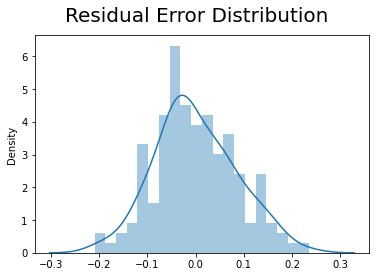

In [535]:
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Residual Error Distribution', fontsize = 20)

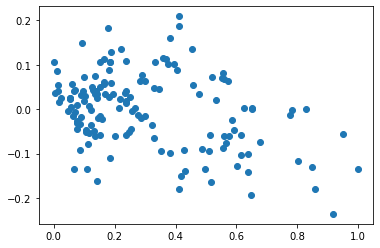

In [548]:
plt.scatter(y_train,res)
plt.show()

In [537]:
df_test[var] = scaler.transform(df_test[var])

df_test.describe()


<ipython-input-537-0a08d5587d8f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test[var] = scaler.transform(df_test[var])
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


,doornumber,wheelbase,carheight,curbweight,cylindernumber,boreratio,stroke,compressionratio,horsepower,peakrpm,...,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
count,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,...,38.000000,38.000000,38.000000,38.0,38.000000,38.0,38.000000,38.000000,38.000000,38.0
mean,0.526316,0.425248,0.442344,0.424879,0.532895,0.584774,0.638625,0.198191,0.396234,0.535562,...,0.105263,0.631579,0.105263,0.0,0.263158,0.0,0.105263,0.552632,0.052632,0.0
std,0.506009,0.202195,0.189202,0.236946,0.132173,0.188845,0.174508,0.251566,0.239017,0.297321,...,0.311012,0.488852,0.311012,0.0,0.446258,0.0,0.311012,0.503897,0.226294,0.0
min,0.000000,0.065217,0.000000,-0.124861,0.250000,0.264286,0.311475,0.000000,-0.032520,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.286232,0.290909,0.279550,0.500000,0.464286,0.551913,0.096875,0.199187,0.351351,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0
50%,1.000000,0.376812,0.481818,0.404273,0.500000,0.535714,0.666667,0.125000,0.382114,0.486486,...,0.000000,1.000000,0.000000,0.0,0.000000,0.0,0.000000,1.000000,0.000000,0.0
75%,1.000000,0.521739,0.579545,0.550638,0.500000,0.771429,0.759563,0.150000,0.520325,0.729730,...,0.000000,1.000000,0.000000,0.0,0.750000,0.0,0.000000,1.000000,0.000000,0.0
max,1.000000,1.000000,0.900000,0.952830,1.000000,0.885714,1.000000,0.968750,0.886179,1.324324,...,1.000000,1.000000,1.000000,0.0,1.000000,0.0,1.000000,1.000000,1.000000,0.0


In [538]:
y_test = df_test.pop('price')
X_test = df_test

In [539]:
X_test = X_test[col_rfe]

In [540]:
X_test.drop(columns=['CarName_buick',  'carbody_hardtop'], inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [541]:
X_test_sm = sm.add_constant(X_test)

In [543]:
y_pred = lm_3.predict(X_test_sm)

Text(0, 0.5, 'y_pred')

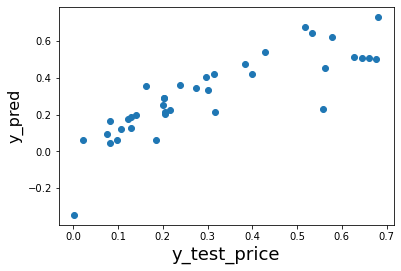

In [544]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
plt.xlabel('y_test_price', fontsize=18)
plt.ylabel('y_pred', fontsize=16)

In [545]:
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

In [546]:
rmse = sqrt(mean_squared_error(y_test, y_pred))
print('Model RMSE:',rmse)

r2=r2_score(y_test, y_pred)
print('Model r2_score:',r2)

Model RMSE: 0.11828292833940214
Model r2_score: 0.6647489438891704
